## Analysis 2

--Analysis showing number of articles in particular section
-- Analysis showing types of news article giving the total number of segment reported by people.

In [3]:
import sys, os, requests, json, re,  matplotlib.pyplot as plt
from collections import Counter
from pylab import *
import glob
files = glob.glob(r'D:\data\data\2015\*')

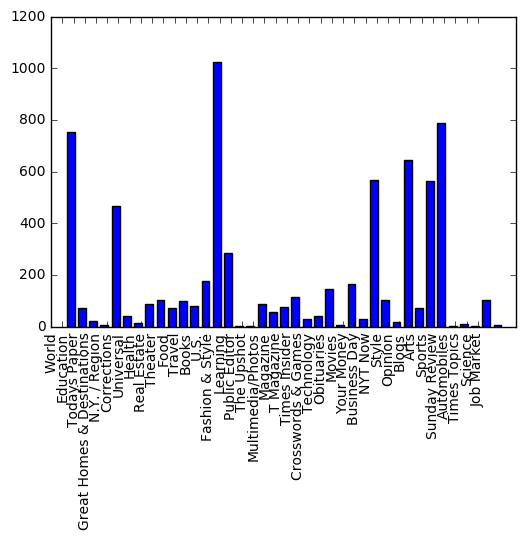

In [7]:
for p in files:     #for loop to read every file of the corpus
    with open(p, 'r') as f:   #open files
        data = json.load(f)   #Loading json files
        

section = []
material = []
source = []
for i in range(len(data["response"]["docs"])):            #iterating over data to collect required data
    temp = data["response"]["docs"][i]["section_name"]
    section.append(str(temp.encode('ascii','ignore').decode('ascii')))
    temp = data["response"]["docs"][i]["type_of_material"]
    material.append(str(temp.encode('ascii','ignore').decode('ascii')))
    temp = data["response"]["docs"][i]["source"]
    source.append(str(temp.encode('ascii','ignore').decode('ascii')))


counter1 = Counter(section)                                 
names1 = counter1.keys()
counts1 = counter1.values()

indexes = arange(len(names1))
width = 0.7
plt.bar(indexes, counts1, width)
plt.xticks(indexes - width * 2, names1, rotation=90)
plt.show()

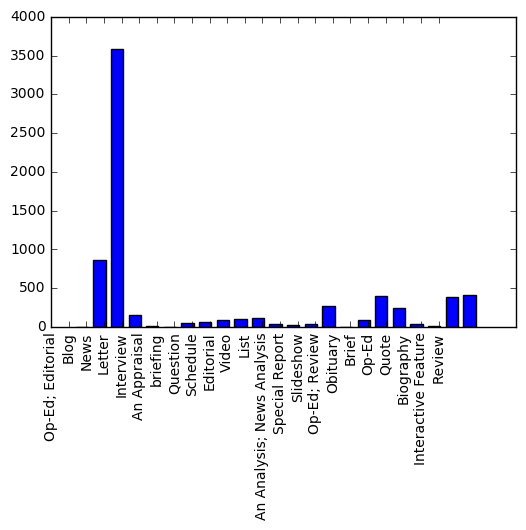

News reported by people are: 76.25% of the total news.


In [9]:
counter2 = Counter(material)
names2 = counter2.keys()
counts2 = counter2.values()

indexes = arange(len(names2))
width = 0.7
plt.bar(indexes, counts2, width)
plt.xticks(indexes - width * 2, names2, rotation=90)
plt.show()

counts3 = 0
for i in range(len(data["response"]["docs"])):
    if data["response"]["docs"][i]["byline"]:
        temp = data["response"]["docs"][i]["byline"]["person"]
        if temp:
            counts3 += 1

total = round(float(counts3)*10000/float(len(data["response"]["docs"])))/100
print('News reported by people are: '+str(total)+'% of the total news.')